# Woche 2 "Hausaufgabe"

In [2]:
# Einlesen der Datei
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("umsatzdaten_gekuerzt.csv")

In [3]:
# Datensatz anzeigen
df.head()

,Datum,Warengruppe,Umsatz
0,2013-07-01,1,148.828353
1,2013-07-02,1,159.793757
2,2013-07-03,1,111.885594
3,2013-07-04,1,168.864941
4,2013-07-05,1,171.280754


In [4]:
# Umwandeln der 'Datum'-Spalte in ein Datumsformat und Extrahieren des Wochentags
df['Datum'] = pd.to_datetime(df['Datum'])
df['Wochentag'] = df['Datum'].dt.day_name()
df.head()

,Datum,Warengruppe,Umsatz,Wochentag
0,2013-07-01,1,148.828353,Monday
1,2013-07-02,1,159.793757,Tuesday
2,2013-07-03,1,111.885594,Wednesday
3,2013-07-04,1,168.864941,Thursday
4,2013-07-05,1,171.280754,Friday


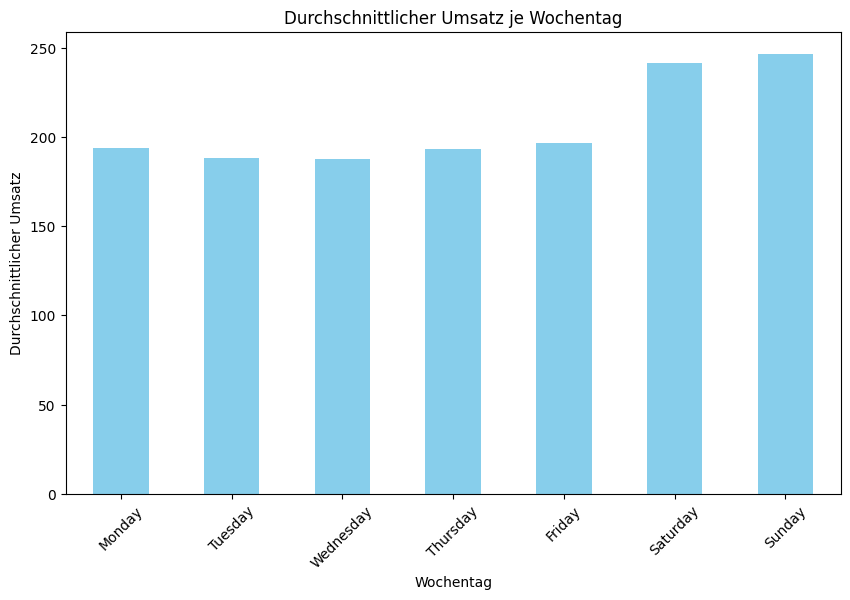

In [5]:
# Berechnung des durchschnittlichen Umsatzes je Wochentag
durchschnittliche_umsaetze = df.groupby('Wochentag')['Umsatz'].mean()
# Info: "df.groupby" gruppiert die Umsätze nach Wochentag

# Reihenfolge der Wochentage festlegen
tage_sortiert = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
durchschnittliche_umsaetze = durchschnittliche_umsaetze.reindex(tage_sortiert)
# Info: ".reindex" ist von pandas und ordnet Reihenfolge der gruppierten Umsätze neu

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6)) # Plot-Maße: 1000x600
durchschnittliche_umsaetze.plot(kind='bar', color='skyblue') # Haupt-Plot-Funktion
# Kosmetisches
plt.title('Durchschnittlicher Umsatz je Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.xticks(rotation=45)
plt.show()

**Konfidenzintervalle ( = Vertrauensbereiche)**

--> 95% ist üblich

Formel:

$$
\text{Konfidenzintervall} = 1.96 \times \left( \frac{\sigma}{\sqrt{n}} \right)\\
mit\ \sigma = Standardabweichung\ und\ n = Anzahl
$$
- 1.96 steht für die 95% --> mit einer Wahrscheinlichkeit von 0,95 liegt
ein Stichprobenergebnis im Bereich von ±1,96 Standardfehlern um den
wahren Wert
- sigma / wurzel(n) ist der "Standardfehler" --> wird oft gerne mit Konfidenzintervall verwechselt

Wochentag
Friday       6.899324
Monday       6.866720
Saturday     8.953564
Sunday       9.552301
Thursday     7.062545
Tuesday      6.763214
Wednesday    6.907339
Name: Umsatz, dtype: float64


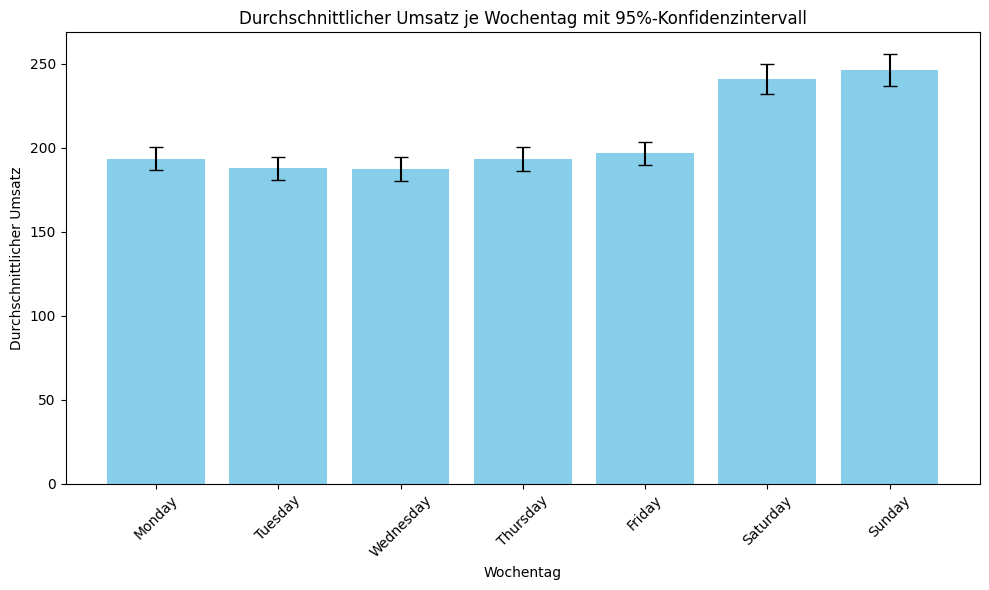

In [ ]:
# Konfidenzintervalle: benötigte Größen
standardabweichungen = df.groupby('Wochentag')['Umsatz'].std()
anzahl = df.groupby('Wochentag')['Umsatz'].count()
konfidenz_intervall = 1.96 * (standardabweichungen / anzahl**0.5)

# Konfidenzintervall-Berechnung (95% Konfidenzintervall)
konfidenz_intervall = 1.96 * (standardabweichungen / anzahl**0.5)

# Konfidenzintervall nach Wochentagen sortieren (wie Umsätze)
konfidenz_intervall = konfidenz_intervall.reindex(tage_sortiert)
print(konfidenz_intervall)

# Erstellen des Balkendiagramms mit Konfidenzintervallen
plt.figure(figsize=(10, 6))
# hier ist die entscheidende Änderung: yerr (y-Error), capsize ist Größe der horizontalen Linien an den Enden der Fehlerbalken
plt.bar(durchschnittliche_umsaetze.index, durchschnittliche_umsaetze, yerr=konfidenz_intervall, color='skyblue', capsize=5)
plt.title('Durchschnittlicher Umsatz je Wochentag mit 95%-Konfidenzintervall')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.xticks(rotation=45)
plt.tight_layout()  # Layout-Optimierung
plt.show()

In [ ]:
# je größer die Stichprobe, desto kleiner das Konfidenzintervall!!
# Warengruppen beachten! diese Lösung betrachtet nur Warengruppe 1!